In [24]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv('youtube_channels .csv')

In [13]:
data.head()

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013


# DATA CLEANING

In [15]:
data.isnull().sum()

rank            0
Youtuber        0
subscribers     0
video views     0
video count     0
category       27
started         0
dtype: int64

In [16]:
data.describe()

,rank,started
count,1000.000000,1000.000000
mean,500.500000,2012.376000
std,288.819436,3.998076
min,1.000000,1970.000000
25%,250.750000,2010.000000
50%,500.500000,2013.000000
75%,750.250000,2015.000000
max,1000.000000,2021.000000


In [17]:
data.describe(include=object)

,Youtuber,subscribers,video views,video count,category
count,1000,1000,1000,1000,973
unique,999,286,991,856,18
top,Bollywood Classics,"11,100,000",0,0,Entertainment
freq,2,21,10,10,241


In [18]:
# Convert numerical columns with comma-separated values to numeric data types
numeric_columns = ['subscribers', 'video views', 'video count']
for column in numeric_columns:
    data[column] = data[column].str.replace(',', '').astype(float)

In [19]:
data.describe()

,rank,subscribers,video views,video count,started
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2.051940e+07,9.197025e+09,8551.059000,2012.376000
std,288.819436,1.578167e+07,1.207128e+10,29359.950431,3.998076
min,1.000000,1.090000e+07,0.000000e+00,0.000000,1970.000000
25%,250.750000,1.260000e+07,3.582208e+09,342.250000,2010.000000
50%,500.500000,1.550000e+07,6.116574e+09,856.000000,2013.000000
75%,750.250000,2.210000e+07,1.124951e+10,3060.500000,2015.000000
max,1000.000000,2.220000e+08,1.984591e+11,329711.000000,2021.000000


In [20]:
data = data.dropna()
data.isnull().sum()

rank           0
Youtuber       0
subscribers    0
video views    0
video count    0
category       0
started        0
dtype: int64

# Is there a clear relationship between a channel's rank and its number of subscribers? Explore this using scatter plots and correlation analysis.

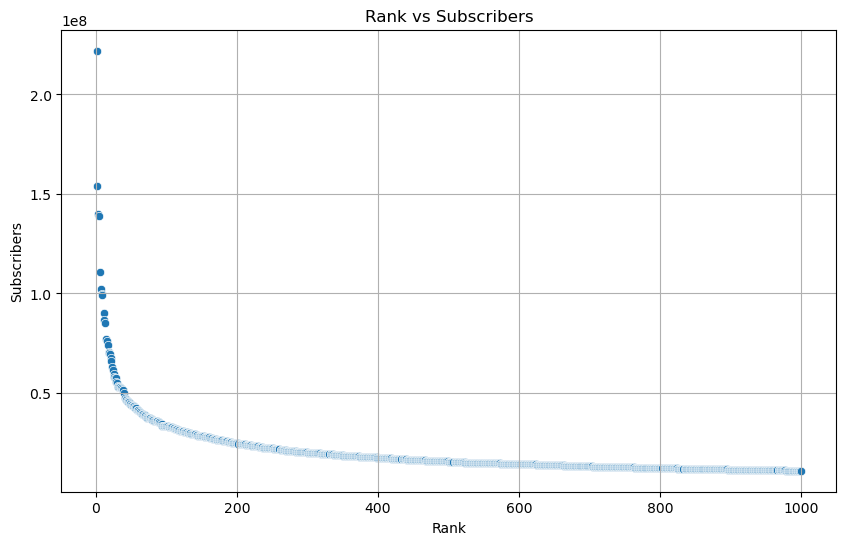

Correlation coefficient: -0.6531337241671201


In [21]:

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rank', y='subscribers', data=data)
plt.title('Rank vs Subscribers')
plt.xlabel('Rank')
plt.ylabel('Subscribers')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation_coefficient = data['rank'].corr(data['subscribers'])
print("Correlation coefficient:", correlation_coefficient)


This negative correlation coefficient suggests that there is a moderately strong negative linear relationship between the rank of a channel and its number of subscribers. In other words, as the rank decreases (i.e., as the channel's rank goes up), the number of subscribers tends to increase, and vice versa.

# Analyze the distribution of subscribers across different category groups. Are there certain categories where channels tend to have significantly more subscribers?



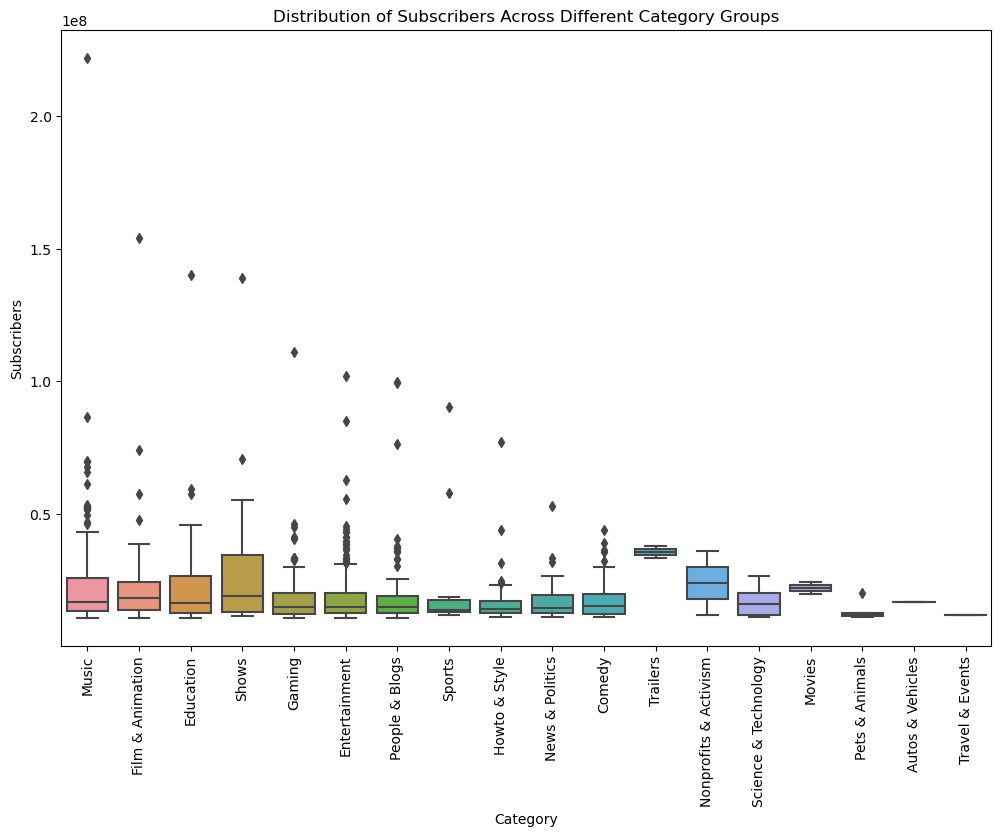

                       count          mean           std         min  \
category                                                               
Autos & Vehicles         1.0  1.670000e+07           NaN  16700000.0   
Comedy                  63.0  1.783968e+07  7.696156e+06  11000000.0   
Education               46.0  2.339565e+07  2.124757e+07  10900000.0   
Entertainment          241.0  1.880871e+07  1.080494e+07  10900000.0   
Film & Animation        52.0  2.352692e+07  2.195307e+07  10900000.0   
Gaming                 102.0  1.864510e+07  1.216762e+07  10900000.0   
Howto & Style           45.0  1.741556e+07  1.090273e+07  11100000.0   
Movies                   2.0  2.215000e+07  3.040559e+06  20000000.0   
Music                  222.0  2.303739e+07  1.876792e+07  10900000.0   
News & Politics         27.0  1.810741e+07  9.178944e+06  11000000.0   
Nonprofits & Activism    2.0  2.385000e+07  1.704127e+07  11800000.0   
People & Blogs         119.0  1.897563e+07  1.353129e+07  109000

In [22]:
# Box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='subscribers', data=data)
plt.title('Distribution of Subscribers Across Different Category Groups')
plt.xlabel('Category')
plt.ylabel('Subscribers')
plt.xticks(rotation=90)  # Rotate category labels for better readability
plt.show()

# Summary statistics
summary_stats = data.groupby('category')['subscribers'].describe()
print(summary_stats)


Based on the summary statistics of subscribers across different category groups, here are some observations:

Shows category has the highest mean number of subscribers (mean = 34,385,714), followed by Trailers (mean = 35,600,000), Music (mean = 23,037,390), and Film & Animation (mean = 23,526,923).
Education, Entertainment, Gaming, and People & Blogs categories also have relatively high mean numbers of subscribers, ranging from approximately 18 to 23 million.
Categories such as Autos & Vehicles, Pets & Animals, Science & Technology, and News & Politics tend to have lower mean numbers of subscribers compared to others.
However, it's essential to note that the spread of subscribers within each category can vary significantly, as indicated by the standard deviations and quartile ranges. For example, the Shows category has a wide range of subscribers, with a maximum of 139 million, while the Autos & Vehicles category has a much narrower range with a maximum of 16.7 million.

Overall, the analysis suggests that certain categories, such as Shows, Trailers, Music, and Film & Animation, tend to have channels with significantly more subscribers compared to others.

# Explore the relationship between a channel's started year and its subscriber growth rate. Do newer channels tend to grow faster than older channels?


In [55]:
ankit = data['Youtuber'].value_counts()
print(ankit)

Youtuber
Bollywood Classics    2
T-Series              1
ZEE5                  1
Wengie                1
GMM25Thailand         1
                     ..
The ACE Family        1
Clash of Clans        1
Sun TV                1
Ninja Kidz TV         1
Dobre Brothers        1
Name: count, Length: 972, dtype: int64


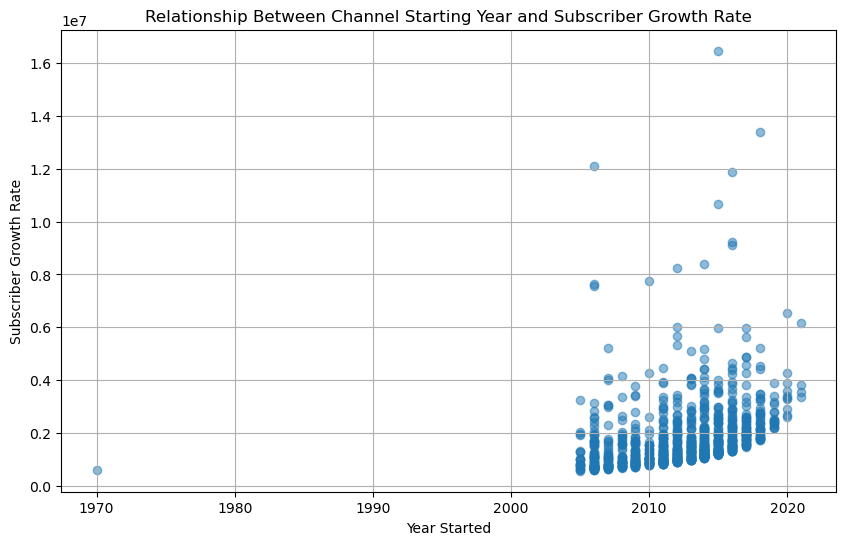

In [56]:
data['subscribers'] = data['subscribers'].astype(float)
data['started'] = pd.to_datetime(data['started'], format='%Y')

# Calculate the number of years since the channel started
data['years_since_started'] = (pd.Timestamp.now() - data['started']).dt.days / 365.25

# Calculate subscriber growth rate (annualized)
data['subscriber_growth_rate'] = data['subscribers'] / data['years_since_started']

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['started'], data['subscriber_growth_rate'], alpha=0.5)
plt.xlabel('Year Started')
plt.ylabel('Subscriber Growth Rate')
plt.title('Relationship Between Channel Starting Year and Subscriber Growth Rate')
plt.grid(True)
plt.show()

*If there's a clear upward trend in the scatter plot, with points generally moving from lower-left to upper-right, it suggests that newer channels tend to have higher subscriber growth rates compared to older channels. In this case, we can conclude that newer channels tend to grow faster than older ones.
*Conversely, if there's no clear pattern or trend in the scatter plot, it indicates that there's no significant relationship between the starting year of a channel and its subscriber growth rate. In this case, we can't conclude that newer channels grow faster than older ones.


# Identify the top 3 ranked channels within each category. Are there any channels that consistently rank high across multiple categories?

In [12]:
# Group data by category
grouped_df = data.groupby('category')

# Create a dictionary to store top 3 ranked channels for each category
top_channels_by_category = {}

# Iterate over each category group
for category, group in grouped_df:
    # Sort channels within the category group by rank
    sorted_group = group.sort_values(by='rank').head(3)
    # Store the top 3 ranked channels in the dictionary
    top_channels_by_category[category] = sorted_group[['Youtuber', 'rank']]

# Print the top 3 ranked channels for each category
for category, top_channels in top_channels_by_category.items():
    print(f"Top 3 ranked channels in {category}:")
    print(top_channels)
    print()



Top 3 ranked channels in Autos & Vehicles:
         Youtuber  rank
432  DUDU e CAROL   433

Top 3 ranked channels in Comedy:
            Youtuber  rank
50  whinderssonnunes    51
66  Luisito Comunica    67
80       CarryMinati    81

Top 3 ranked channels in Education:
                                       Youtuber  rank
2                    Cocomelon - Nursery Rhymes     3
24  Pinkfong Baby Shark - Kids' Songs & Stories    25
26        ChuChu TV Nursery Rhymes & Kids Songs    27

Top 3 ranked channels in Entertainment:
         Youtuber  rank
6         MrBeast     7
12  Vlad and Niki    13
22         Zee TV    23

Top 3 ranked channels in Film & Animation:
          Youtuber  rank
1   YouTube Movies     2
16       Goldmines    17
27      Movieclips    28

Top 3 ranked channels in Gaming:
       Youtuber  rank
5     PewDiePie     6
43  JuegaGerman    44
47   Fernanfloo    48

Top 3 ranked channels in Howto & Style:
            Youtuber  rank
13   5-Minute Crafts    14
49       BRIGHT 

# If data from multiple time periods is available, analyse how the rank of channels has changed over time.


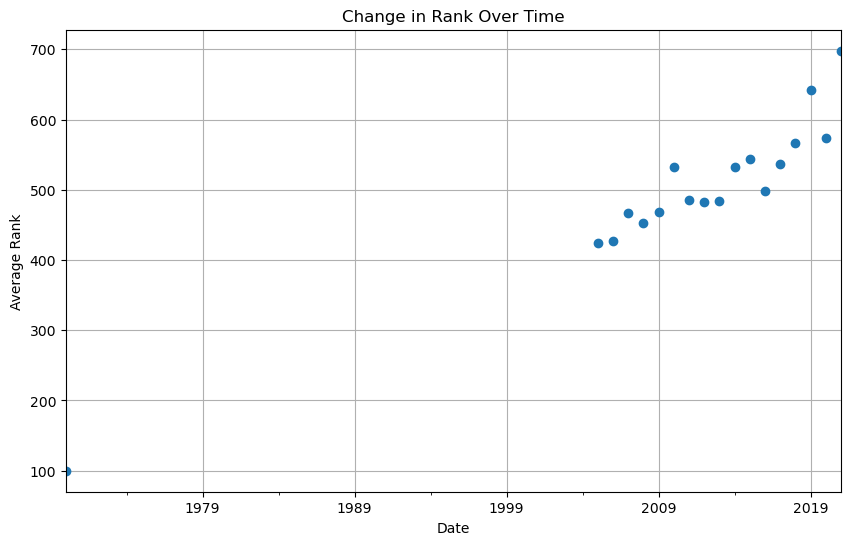

In [57]:
data['started'] = pd.to_datetime(data['started'])

# Group data by 'started' column and calculate the average rank for each time period
rank_over_time = data.groupby(pd.Grouper(key='started', freq='M'))['rank'].mean()

# Plot the change in rank over time
plt.figure(figsize=(10, 6))
rank_over_time.plot(marker='o', linestyle='-')
plt.title('Change in Rank Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rank')
plt.grid(True)
plt.show()

# Explore the relationship between the video count and the number of subscribers for each channel. Do channels with more uploaded videos tend to have more subscribers?

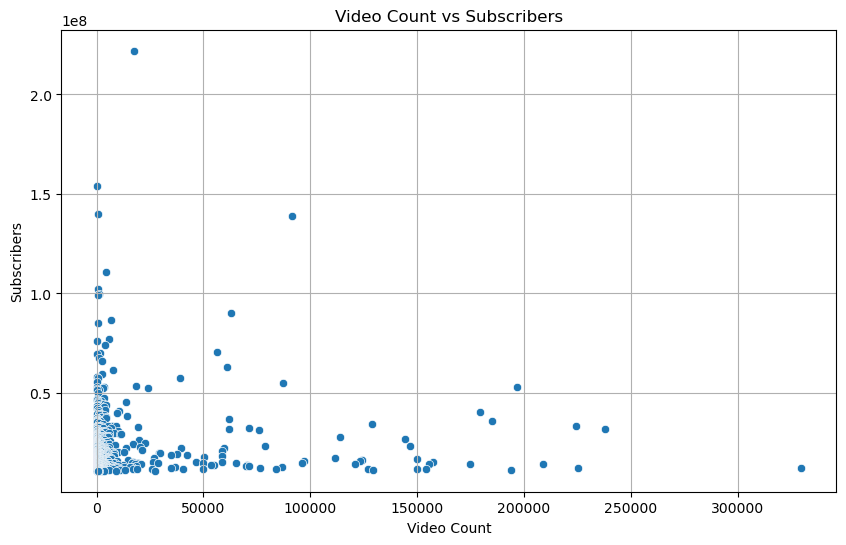

Correlation coefficient: 0.06712018893515084


In [13]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='video count', y='subscribers', data=data)
plt.title('Video Count vs Subscribers')
plt.xlabel('Video Count')
plt.ylabel('Subscribers')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation_coefficient = data['video count'].corr(data['subscribers'])
print("Correlation coefficient:", correlation_coefficient)



The correlation coefficient between the video count and the number of subscribers for each channel is approximately 0.067.

This positive but weak correlation coefficient suggests that there is a very slight positive linear relationship between the number of uploaded videos and the number of subscribers. However, the correlation is weak, indicating that the relationship is not particularly strong.

In other words, while there may be a tendency for channels with more uploaded videos to have slightly more subscribers, the correlation is not significant enough to make a strong conclusion. Other factors likely play a more critical role in determining the number of subscribers a channel has.

# Compare the average video views for different category groups. Are there certain content categories that generally attract more views?

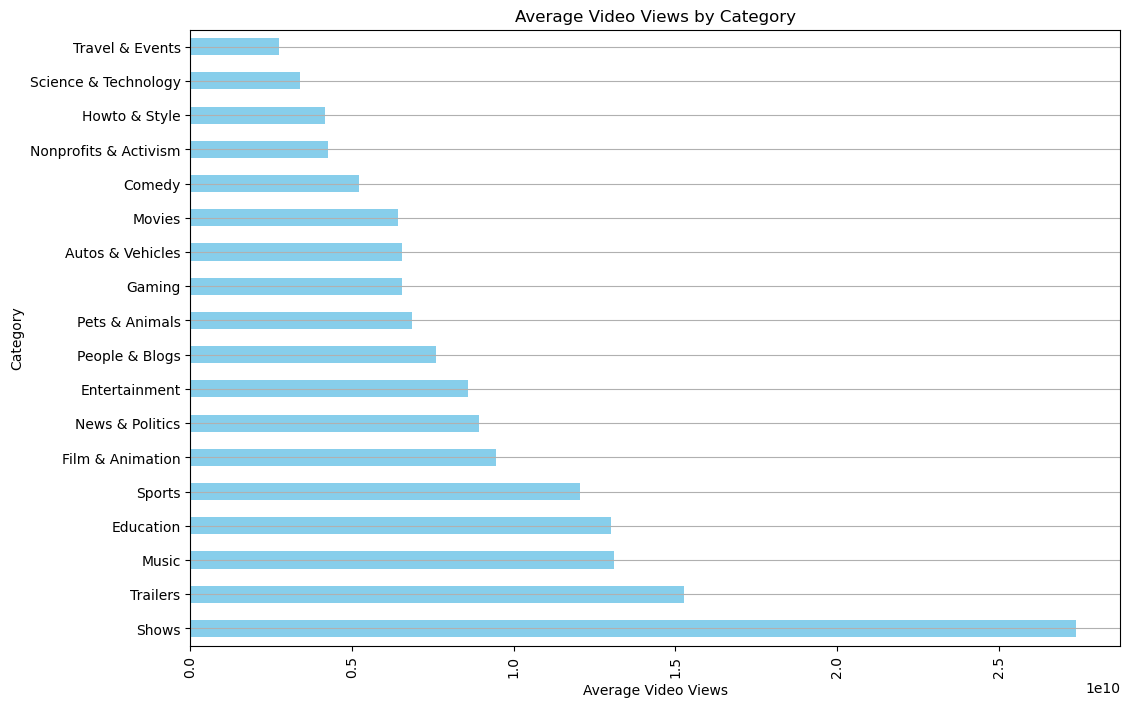

In [26]:
# Calculate the mean video views for each category
average_views_by_category = data.groupby('category')['video views'].mean().sort_values(ascending=False)

# Visualize the results using a bar plot
plt.figure(figsize=(12, 8))
average_views_by_category.plot(kind='barh', color='skyblue')
plt.title('Average Video Views by Category')
plt.xlabel('Average Video Views')
plt.ylabel('Category')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


# Analyze the relationship between the average number of video views and the frequency of video uploads for each channel.

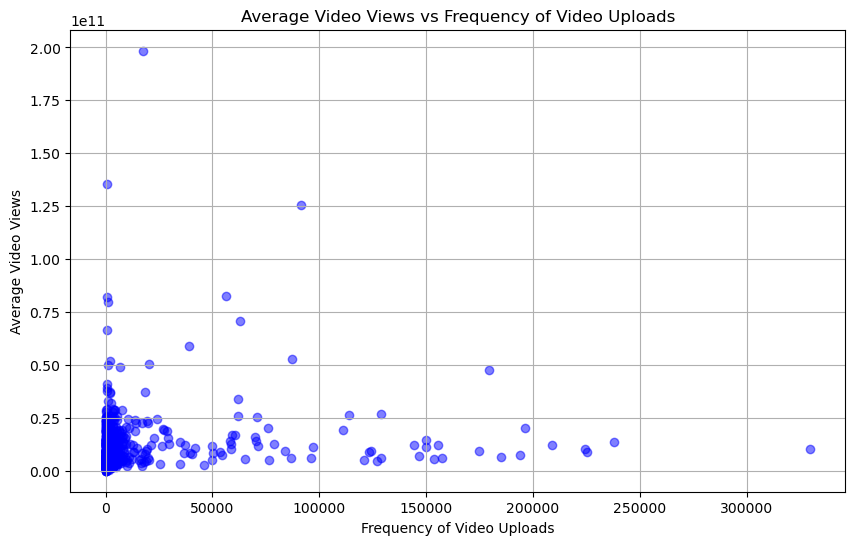

Correlation coefficient: 0.14687392841749597


In [15]:
# Calculate the average number of video views for each channel
average_views_per_channel = data.groupby('Youtuber')['video views'].mean()

# Calculate the frequency of video uploads for each channel
video_count_per_channel = data.groupby('Youtuber')['video count'].sum()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(video_count_per_channel, average_views_per_channel, color='blue', alpha=0.5)
plt.title('Average Video Views vs Frequency of Video Uploads')
plt.xlabel('Frequency of Video Uploads')
plt.ylabel('Average Video Views')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation_coefficient = video_count_per_channel.corr(average_views_per_channel)
print("Correlation coefficient:", correlation_coefficient)



The correlation coefficient between the frequency of video uploads and the average number of video views for each channel is approximately 0.147.

This positive but weak correlation coefficient suggests that there is a slight positive linear relationship between the frequency of video uploads and the average number of video views for each channel. However, the correlation is weak, indicating that the relationship is not particularly strong.

In other words, while there may be a tendency for channels that upload more videos to attract slightly more views on average, the correlation is not significant enough to make a strong conclusion. Other factors likely play a more critical role in determining the average number of video views for each channel.

# Identify the top 10 videos with the highest video views within each category. Analyze any commonalities or patterns among these high-performing videos.

In [29]:
# Group data by category
grouped_by_category = data.groupby('category')

# Create an empty list to store top 10 videos for each category
top_videos_by_category = []

# Iterate over each category group
for category, group in grouped_by_category:
    # Select the top 10 videos with the highest views in the category
    top_videos = group.nlargest(10, 'video views')
    # Add the top 10 videos to the list
    top_videos_by_category.append(top_videos)

# Concatenate the top videos from each category into a single DataFrame
top_videos_df = pd.concat(top_videos_by_category)

# Analyze commonalities or patterns among the high-performing videos
commonalities_patterns = top_videos_df[['Youtuber', 'video views', 'video count', 'started', 'category']]
print(commonalities_patterns)


                                   Youtuber   video views  video count  \
432                            DUDU e CAROL  6.530946e+09       2874.0   
314                                LankyBox  2.578752e+10       5545.0   
131  The Tonight Show Starring Jimmy Fallon  1.600624e+10       7897.0   
86                        Jkk Entertainment  1.513344e+10        194.0   
157                             Talking Tom  1.390848e+10        447.0   
..                                      ...           ...          ...   
642                            FC Barcelona  2.203377e+09       9960.0   
710                                 DALLMYD  1.738312e+09        616.0   
97                          Ultra Bollywood  1.550827e+10       9078.0   
71                             Ishtar Music  1.499924e+10       4535.0   
821                            Más SKabeche  2.746046e+09        632.0   

     started          category  
432     2013  Autos & Vehicles  
314     2016            Comedy  
131     2006

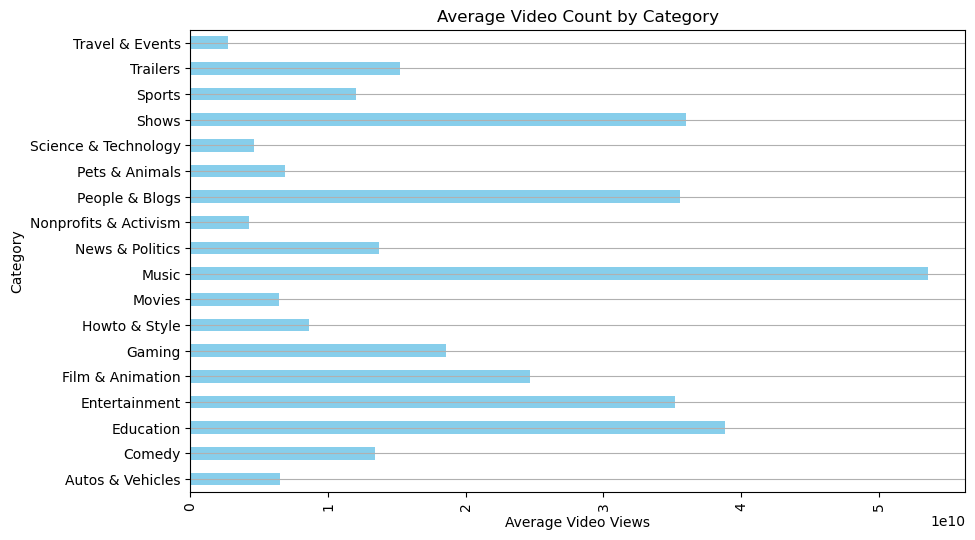

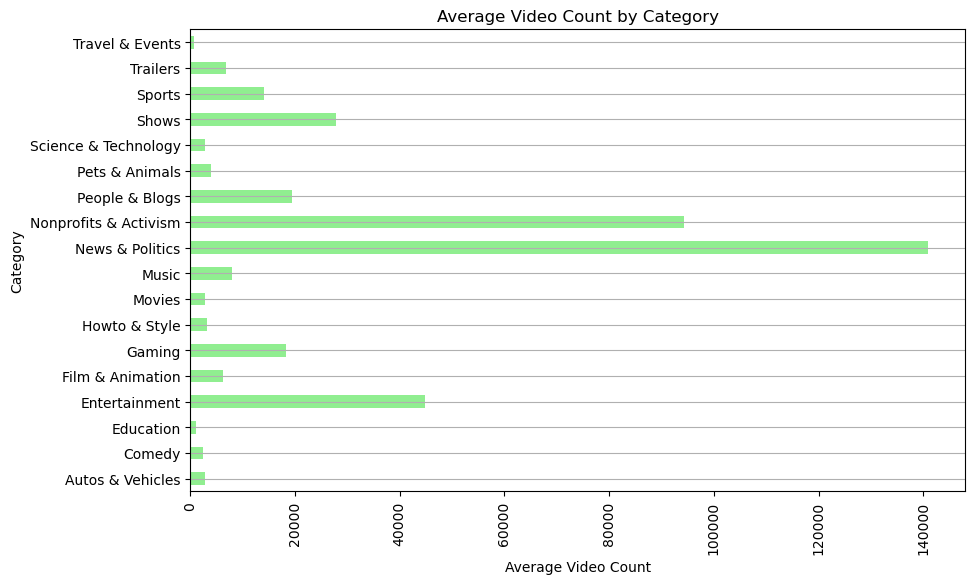

In [32]:


# Bar plot for average video views by category
plt.figure(figsize=(10, 6))
commonalities_patterns.groupby('category')['video views'].mean().plot(kind='barh', color='skyblue')
plt.title('Average Video Count by Category')
plt.xlabel('Average Video Views')
plt.ylabel('Category')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Bar plot for average video count by category
plt.figure(figsize=(10, 6))
commonalities_patterns.groupby('category')['video count'].mean().plot(kind='barh', color='lightgreen')
plt.title('Average Video Count by Category')
plt.xlabel('Average Video Count')
plt.ylabel('Category')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()





# Is there a correlation between the number of subscribers a channel has and the average number of video views it receives?

In [18]:
# Calculate the average number of video views for each channel
average_views_per_channel = data.groupby('Youtuber')['video views'].mean()

# Calculate the number of subscribers for each channel
subscribers_per_channel = data.groupby('Youtuber')['subscribers'].first()

# Calculate correlation coefficient
correlation_coefficient = subscribers_per_channel.corr(average_views_per_channel)
print("Correlation coefficient:", correlation_coefficient)


Correlation coefficient: 0.7889467685020731


The correlation coefficient between the number of subscribers a channel has and the average number of video views it receives is approximately 0.789.

This strong positive correlation coefficient indicates a significant positive linear relationship between the number of subscribers and the average number of video views a channel receives. In other words, channels with more subscribers tend to receive more video views on average, and vice versa.

# Analyse the number of different category types each channel creates content for. Do successful channels tend to specialise in one category or diversify their content?

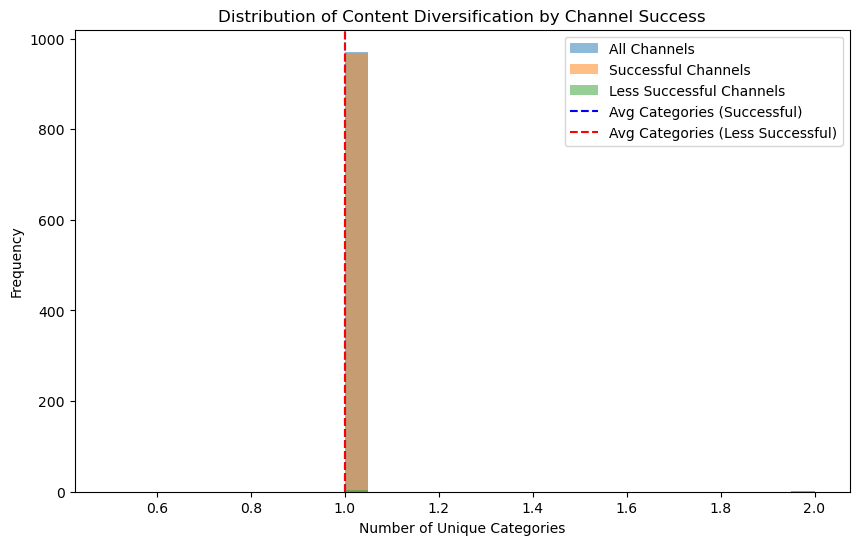

In [38]:
# channel_category_counts = data.groupby('Youtuber')['category'].nunique()

# # Assuming 'views' is a column indicating channel success (e.g., high views, subscribers, etc.)
# # Split data into successful and less successful channels
# successful_channels = data[data['video views'] > 1000000]  # Adjust threshold as needed
# less_successful_channels = data[data['video views'] <= 1000000]  # Adjust threshold as needed

# # Calculate average number of unique categories for successful and less successful channels
# avg_categories_successful = successful_channels.groupby('Youtuber')['category'].nunique().mean()
# avg_categories_less_successful = less_successful_channels.groupby('Youtuber')['category'].nunique().mean()

# # Visualize the distribution of unique category counts for successful and less successful channels
# plt.figure(figsize=(10, 6))
# plt.hist(channel_category_counts, bins=20, alpha=0.5, label='All Channels')
# plt.hist(successful_channels['Youtuber'].value_counts(), bins=20, alpha=0.5, label='Successful Channels')
# plt.hist(less_successful_channels['Youtuber'].value_counts(), bins=20, alpha=0.5, label='Less Successful Channels')
# plt.axvline(x=avg_categories_successful, color='blue', linestyle='--', label='Avg Categories (Successful)')
# plt.axvline(x=avg_categories_less_successful, color='red', linestyle='--', label='Avg Categories (Less Successful)')
# plt.xlabel('Number of Unique Categories')
# plt.ylabel('Frequency')
# plt.title('Distribution of Content Diversification by Channel Success')
# plt.legend()
# plt.show()

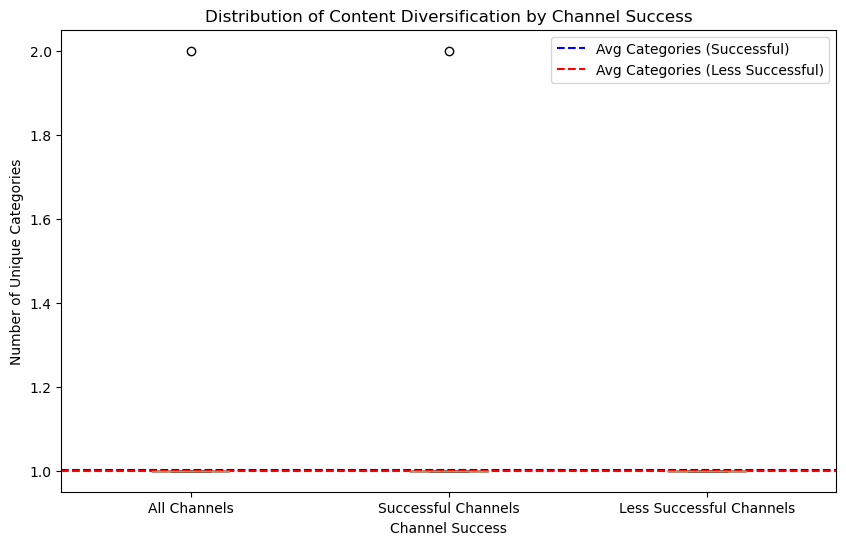

In [44]:
# successful_channels = data[data['video views'] > 1000000]  # Adjust threshold as needed
# less_successful_channels = data[data['video views'] <= 1000000]  # Adjust threshold as needed

# # Calculate the number of unique categories for each channel
# channel_category_counts = data.groupby('Youtuber')['category'].nunique()

# # Calculate average number of unique categories for successful and less successful channels
# avg_categories_successful = successful_channels.groupby('Youtuber')['category'].nunique().mean()
# avg_categories_less_successful = less_successful_channels.groupby('Youtuber')['category'].nunique().mean()

# # Visualize the distribution of unique category counts for successful and less successful channels
# plt.figure(figsize=(10, 6))
# plt.boxplot([channel_category_counts, successful_channels['Youtuber'].value_counts(), less_successful_channels['Youtuber'].value_counts()],
#             labels=['All Channels', 'Successful Channels', 'Less Successful Channels'])
# plt.axhline(y=avg_categories_successful, color='blue', linestyle='--', label='Avg Categories (Successful)')
# plt.axhline(y=avg_categories_less_successful, color='red', linestyle='--', label='Avg Categories (Less Successful)')
# plt.xlabel('Channel Success')
# plt.ylabel('Number of Unique Categories')
# plt.title('Distribution of Content Diversification by Channel Success')
# plt.legend()
# plt.show()

# Explore if there are any noticeable differences in the category choices or video count for channels that started in different time periods



<Figure size 1200x800 with 0 Axes>

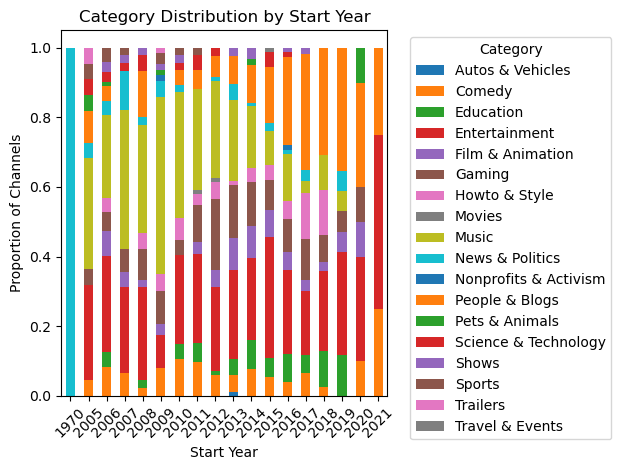

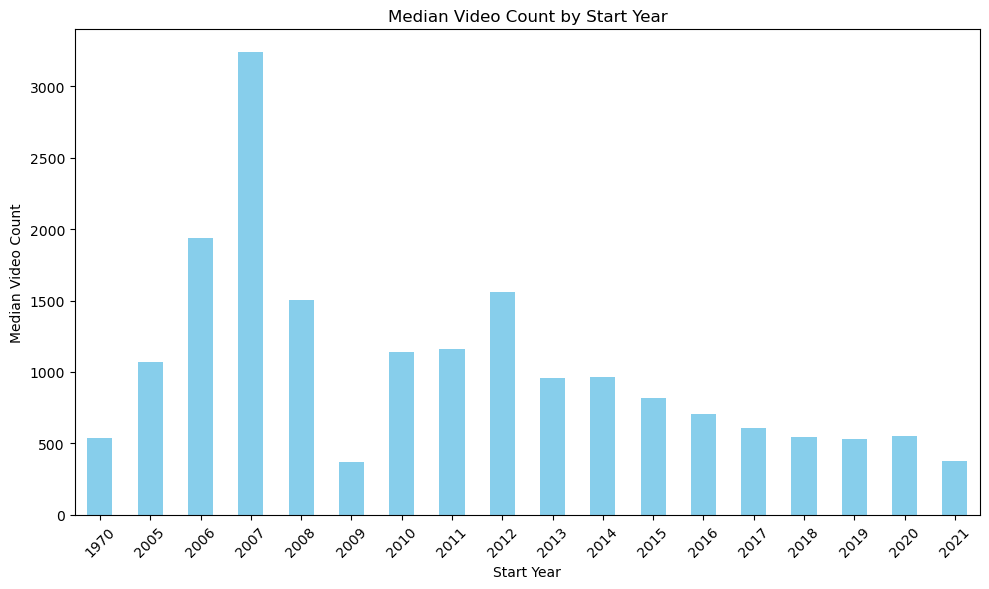

In [19]:
# Group data by the start year of the channels
grouped_by_start_year = data.groupby('started')

# Calculate the distribution of categories for each start year
category_distribution_by_start_year = grouped_by_start_year['category'].value_counts(normalize=True).unstack()

# Plot category distribution for each start year
plt.figure(figsize=(12, 8))
category_distribution_by_start_year.plot(kind='bar', stacked=True)
plt.title('Category Distribution by Start Year')
plt.xlabel('Start Year')
plt.ylabel('Proportion of Channels')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the median video count for each start year
median_video_count_by_start_year = grouped_by_start_year['video count'].median()

# Plot median video count for each start year
plt.figure(figsize=(10, 6))
median_video_count_by_start_year.plot(kind='bar', color='skyblue')
plt.title('Median Video Count by Start Year')
plt.xlabel('Start Year')
plt.ylabel('Median Video Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Analyze whether the frequency of video uploads varies across different category groups.

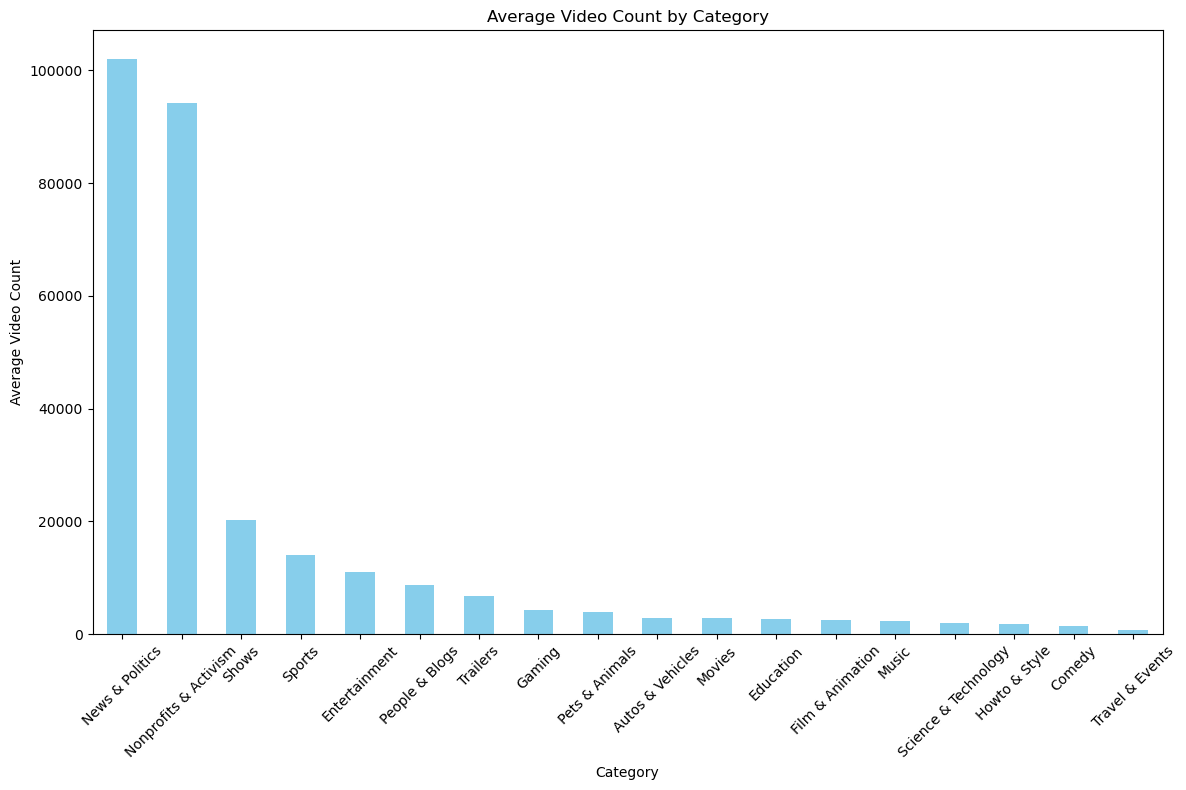

In [21]:
# Calculate the average video count for each category
average_video_count_by_category = data.groupby('category')['video count'].mean().sort_values(ascending=False)

# Plot the distribution of video counts across categories
plt.figure(figsize=(12, 8))
average_video_count_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Video Count by Category')
plt.xlabel('Category')
plt.ylabel('Average Video Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Compare the performance metrics (subscriber count, video views) of channels that started early (e.g., before 2010) to those that started more recently.

In [22]:
# Convert 'started' column to datetime format
data['started'] = pd.to_datetime(data['started'], format='%Y')

# Define the cutoff year for early and recent channels
cutoff_year = pd.to_datetime('2010')

# Group data based on start year and categorize as early or recent
data['start_category'] = np.where(data['started'] < cutoff_year, 'Early', 'Recent')

# Calculate average subscriber count and average video views for each start category
performance_metrics_by_start_category = data.groupby('start_category').agg({
    'subscribers': 'mean',
    'video views': 'mean'
})

# Print the performance metrics
print(performance_metrics_by_start_category)


                 subscribers   video views
start_category                            
Early           2.333629e+07  1.300904e+10
Recent          1.935048e+07  8.040279e+09


Based on the analysis:

- Early Channels: The average number of subscribers for channels that started before 2010 is approximately 23,336,290, and the average number of video views is approximately 13,009,040,000.
- Recent Channels: For channels that started after 2010 (recent channels), the average number of subscribers is approximately 19,350,480, and the average number of video views is approximately 8,040,279,000.

From these results, we can observe that early channels tend to have slightly higher average subscriber counts and higher average video views compared to recent channels. This could be due to various factors such as the maturity of the platform, changes in user behavior,

## Analyze the relationship between a channel's rank and its average number of video views. Do higher-ranked channels consistently get more views?


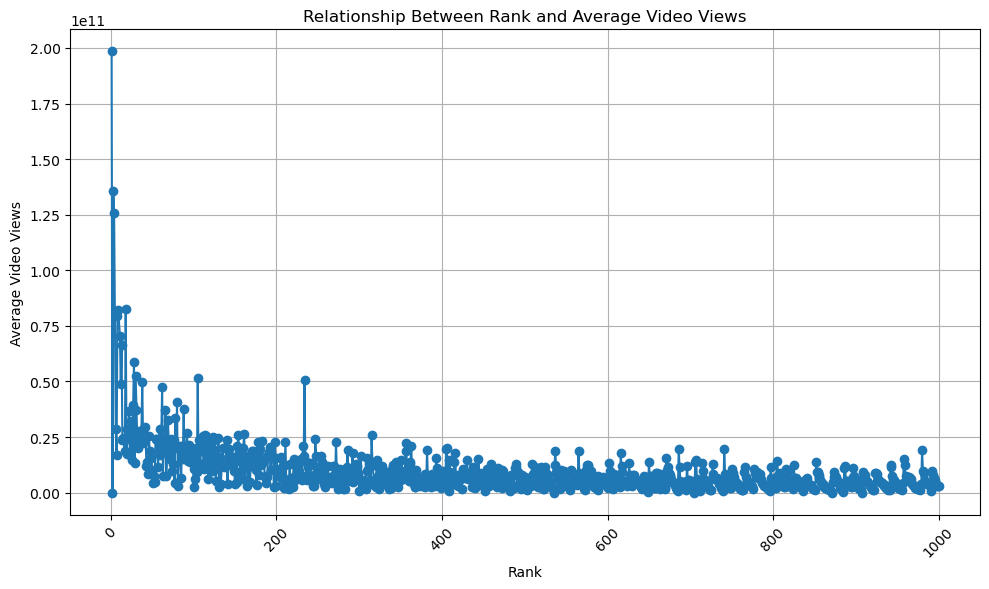

In [23]:
# Calculate the average video views for each rank
average_video_views_by_rank = data.groupby('rank')['video views'].mean()

# Plot the relationship between rank and average video views
plt.figure(figsize=(10, 6))
plt.plot(average_video_views_by_rank.index, average_video_views_by_rank.values, marker='o', linestyle='-')
plt.title('Relationship Between Rank and Average Video Views')
plt.xlabel('Rank')
plt.ylabel('Average Video Views')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Explore the relationship between a channel's rank and its video count. Do higher-ranked channels tend to have a larger number of uploaded videos?


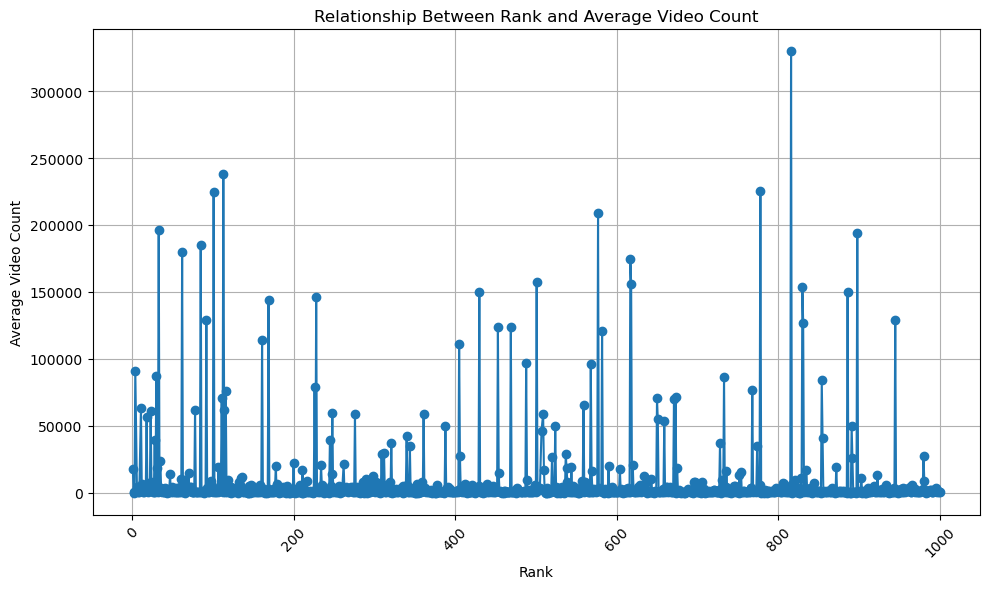

In [24]:
# Calculate the average video count for each rank
average_video_count_by_rank = data.groupby('rank')['video count'].mean()

# Plot the relationship between rank and average video count
plt.figure(figsize=(10, 6))
plt.plot(average_video_count_by_rank.index, average_video_count_by_rank.values, marker='o', linestyle='-')
plt.title('Relationship Between Rank and Average Video Count')
plt.xlabel('Rank')
plt.ylabel('Average Video Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Analyze whether certain category types are associated with faster or slower subscriber growth rates.


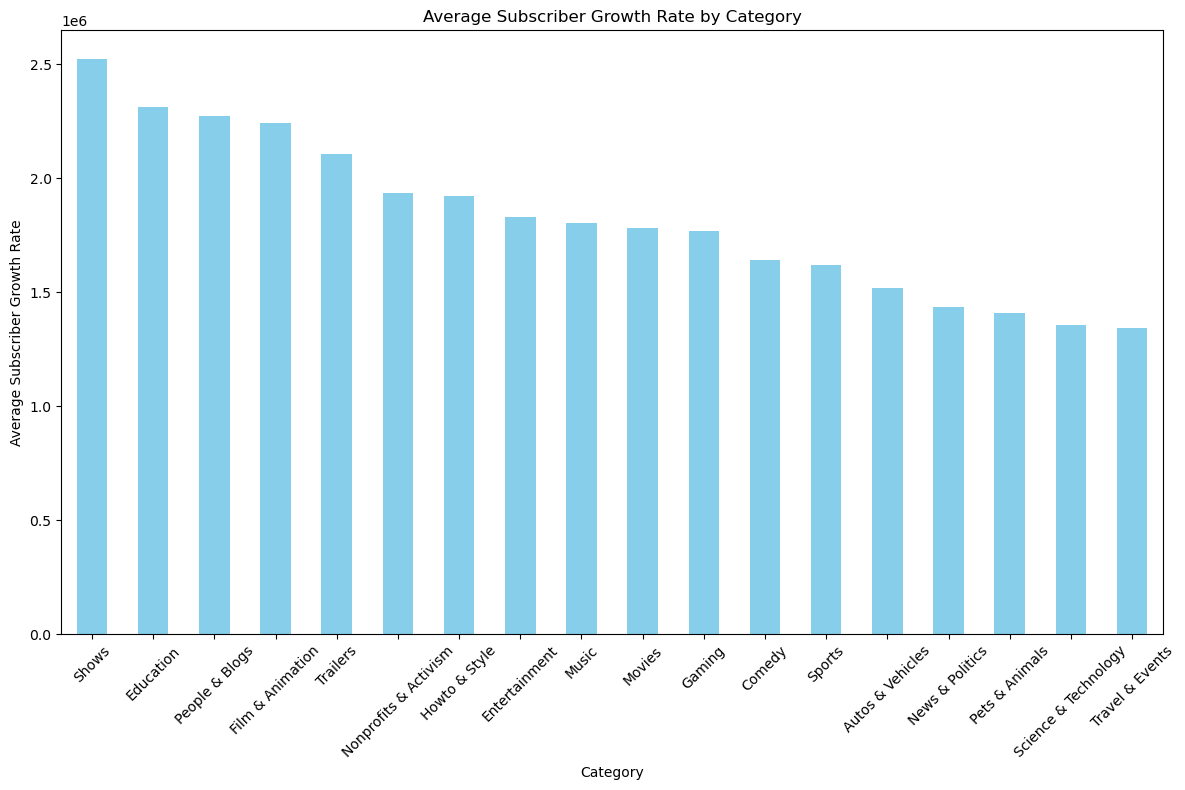

In [25]:
# Calculate subscriber growth rate for each channel
data['subscriber_growth_rate'] = data['subscribers'] / (2024 - data['started'].dt.year)

# Group channels by category and calculate average subscriber growth rate for each category
average_growth_rate_by_category = data.groupby('category')['subscriber_growth_rate'].mean().sort_values(ascending=False)

# Plot the average subscriber growth rates across different categories
plt.figure(figsize=(12, 8))
average_growth_rate_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Subscriber Growth Rate by Category')
plt.xlabel('Category')
plt.ylabel('Average Subscriber Growth Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
